In [1]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from tqdm.notebook import tqdm

In [2]:
def run_simulation(maxback):
    jumps = 0
    location = 0
    while location!=1:
        randomnumber = np.random.rand()
        if randomnumber<=0.6:
            location = location + 1
            jumps = jumps + 1
        else:
            location = location - 1
            jumps = jumps + 1
            if location<maxback:
                location = maxback
    return jumps

def run_N_simulations(N,maxback):
    inputs = [maxback]*N
    # print(inputs)
    # print(range(N))
    def parallel_func(i):
        return run_simulation(inputs[i])
    results = Parallel(n_jobs=6)(delayed(parallel_func)(a) for a in range(N))
    return results

def vary_maxback(start,end,N):
    maxbacks = -np.arange(start,end,1)
    res = []
    for a in tqdm(range(len(maxbacks))):
        maxback = maxbacks[a]
        res.append(np.mean(run_N_simulations(N,maxback)))
    return res
    
    

In [5]:
results = vary_maxback(1,100,10**5)

  0%|          | 0/99 [00:00<?, ?it/s]

Text(0, 0.5, 'Expected number of jumps to get to 1')

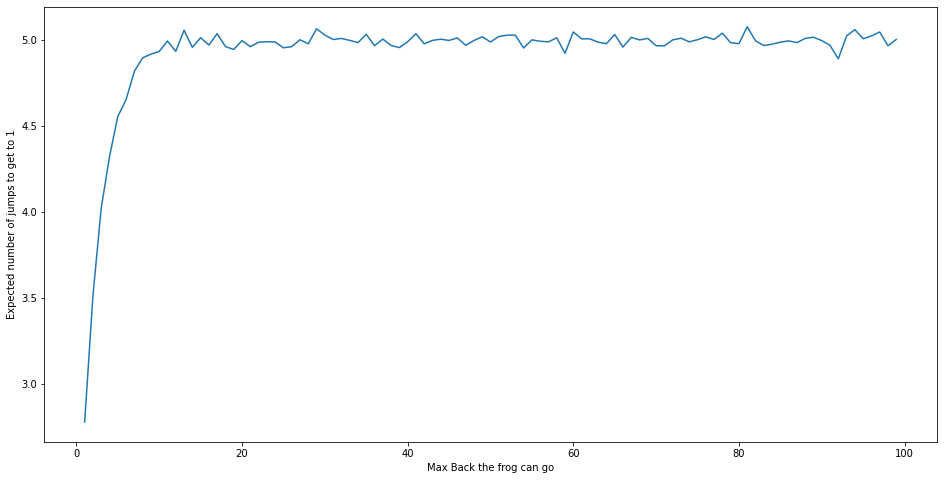

In [7]:
plt.figure(figsize=(16,8))
plt.plot(np.arange(1,100,1),results)
plt.xlabel('Max Back the frog can go')
plt.ylabel('Expected number of jumps to get to 1')